# Import Essential modules

In [4]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
from matplotlib import pyplot as plt, ticker as mticker
from matplotlib.ticker import StrMethodFormatter, NullFormatter
import pickle
import matplotlib.transforms as mtransforms
from matplotlib import cbook

plt.rcParams['grid.alpha'] = 1
plt.rcParams["font.size"] = 15
plt.rcParams['grid.color'] = "#949292"
plt.rcParams['grid.linestyle'] = "--"
plt.rcParams['font.sans-serif'] = "Times New Roman"
plt.rcParams['font.family'] = "sans-serif"
legend_properties = {'weight':'bold'}
plt.rcParams["axes.labelsize"] = 30
plt.rcParams["axes.titlesize"] = 30
plt.rcParams["xtick.labelsize"] = 30
plt.rcParams["ytick.labelsize"] = 30
plt.rcParams["font.size"] = 20
plt.rcParams["lines.linewidth"] = 1.5
plt.rcParams["lines.markersize"] = 1
plt.rcParams["legend.fontsize"] = 25




# TG Value comparison data in a Medium-scale environment

In [5]:
## TG value obtained by running 0%, 10%, 30%, 40% attacker case in a medium-scale environment (10x10 grid, 10 agents,
## 3 obstacles, 1 freeway)

df = pd.DataFrame({"AttackerPercentage": ['0%','10%', '30%', '40%'],
                   "AdhocTD":[750.2, 8214.7, 14845.5, 15640.1],
                   "DA_RL": [1032.7, 1720.4, 2470.1, 2660.2],
                   "BRNES": [1188.9, 1387.6, 1598.2,1877.7]})
df

,AttackerPercentage,AdhocTD,DA_RL,BRNES
0,0%,750.2,1032.7,1188.9
1,10%,8214.7,1720.4,1387.6
2,30%,14845.5,2470.1,1598.2
3,40%,15640.1,2660.2,1877.7


# Plotting Graph for TG value Comparison and Convergence

<ipython-input-7-9a1e2f3481b9>:54: UserWarning: Attempted to set non-positive bottom ylim on a log-scaled axis.
Invalid limit will be ignored.
  axs[0].set_ylim(0,50000)
<ipython-input-7-9a1e2f3481b9>:98: MatplotlibDeprecationWarning: Adding an axes using the same arguments as a previous axes currently reuses the earlier instance.  In a future version, a new instance will always be created and returned.  Meanwhile, this warning can be suppressed, and the future behavior ensured, by passing a unique label to each axes instance.
  ax2 = fig.add_axes([left, bottom, width, height])
<ipython-input-7-9a1e2f3481b9>:98: MatplotlibDeprecationWarning: Adding an axes using the same arguments as a previous axes currently reuses the earlier instance.  In a future version, a new instance will always be created and returned.  Meanwhile, this warning can be suppressed, and the future behavior ensured, by passing a unique label to each axes instance.
  ax2 = fig.add_axes([left, bottom, width, height])


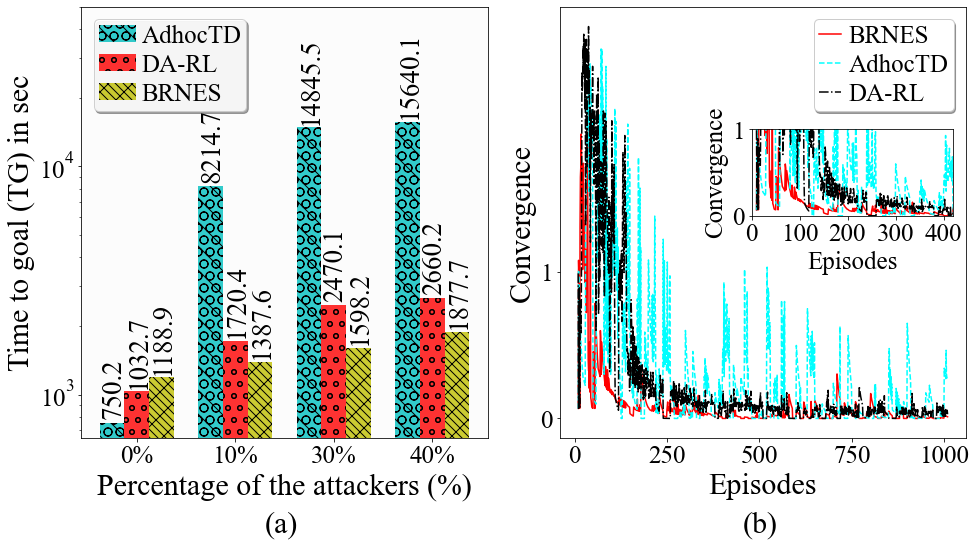

In [7]:
m1 = df["AdhocTD"]
m2 = df["DA_RL"]
m3 = df["BRNES"]

x=df['AttackerPercentage']
index = np.arange(len(x))

fig, axs = plt.subplots(1,2, figsize=(14,8))

axs[0].patch.set_facecolor('#ebebeb')
axs[0].patch.set_alpha(0.1)
bar_width = 0.25
opacity = 0.8
error_config = {'ecolor': '0.9'}
r1 = axs[0].bar(index-bar_width, m1, bar_width,
                 alpha=opacity,
                 color='c',
                 error_kw=error_config, label='AdhocTD')
r2 = axs[0].bar(index, m2, bar_width,
                 alpha=opacity,
                 color='r',
                 error_kw=error_config, label='DA-RL')
r3 = axs[0].bar(index + bar_width, m3, bar_width,
                 alpha=opacity,
                 color='y',
                 error_kw=error_config, label='BRNES')
axs[0].xaxis.get_major_locator().set_params(nbins=5)
axs[0].yaxis.get_major_locator().set_params(nbins=20)
axs[0].set_xticks(index)
axs[0].set_xticklabels(x)

def autolabel(rects):
    """Attach a text label above each bar in *rects*, displaying its height."""
    for rect in rects:
        height = rect.get_height()
        axs[0].annotate('{}'.format(height), fontsize=27,
                    xy=(rect.get_x() + rect.get_width() / 3, height),
                    xytext=(6, 3),  # 3 points vertical offset
                    textcoords="offset points",
                    ha='center', va='bottom', rotation=90)

autolabel(r1)
autolabel(r2)
autolabel(r3)
bars = axs[0].patches
patterns =('\O', 'o', '\\x\\','x.','O','O','o','\\','\\\\')
hatches = [p for p in patterns for i in range(len(df))]
for bar, hatch in zip(bars, hatches):
    bar.set_hatch(hatch)
axs[0].set_yscale('log')

axs[0].legend(loc='upper left', fancybox=True, shadow=True, framealpha = 0.9,
          borderpad=0.2,labelspacing=0.2, handlelength=1.5,columnspacing=0.5,handletextpad=0.2)
axs[0].set_ylim(0,50000) 
axs[0].set_xlabel('Percentage of the attackers (%)')
axs[0].set_ylabel('Time to goal (TG) in sec')


#convergence
gap3 = 1
x3 = list(np.linspace(10,1010,int(1000/gap3), endpoint=False))
folderName = ['BRNES','AdhocTD', 'DARL']
legend = ['BRNES','AdhocTD', 'DA-RL']
fName = [['9fb38', '4f96f', '2fa5e']]
agentNo = [10, 10, 10, 10]
obsNo = [3,3, 3,3]
zoneNo = ['10x10', '10x10', '10x10', '10x10']
attackerNo = ['No Attacker', '10% Attacker', '30% Attacker', '40% Attacker']
category = ['Step', 'Reward', 'convergence']
lineStyle = ['s-','v--','o-.','^-.','*--','s-']
color = ['red','cyan','black','magenta','blue','green']
markerFace = ['none','cyan','none','magenta','blue','green']
markerEdge = ["black","black","black","black","black","black"]

axs[1].set_xlabel('Episodes')
axs[1].set_ylabel('Convergence')

for i in range(1):
    for j in range(len(fName[i])):
        if folderName[j] in ['BRNES', 'AdhocTD', 'DARL']:
            plt.rcParams["xtick.labelsize"] = 30
            plt.rcParams["ytick.labelsize"] = 30
            fileName = fName[i][j]
            #convergence
            plt.rcParams["lines.markersize"] = 0
            with open("./Convergence/"+str(fileName)+"_"+str(folderName[j])+"_convergence", "rb") as Cp:   # Unpickling
                convergenceVal = pickle.load(Cp)
            
            convergenceAvg = [np.average(x) for x in zip(*convergenceVal)]
            convergenceAvg = [convergenceAvg[x:x+gap3] for x in range(0, len(convergenceAvg),gap3)]
            convergenceAvg = np.mean(np.array(convergenceAvg), axis = 1)
            axs[1].plot(x3, convergenceAvg, lineStyle[j], color = color[j],  markerfacecolor=markerFace[j],
                              markeredgecolor=markerEdge[j], label = legend[j])
            
            plt.rcParams["xtick.labelsize"] = 25
            plt.rcParams["ytick.labelsize"] = 25
            left, bottom, width, height = [0.76, 0.6, 0.20, 0.15]
            ax2 = fig.add_axes([left, bottom, width, height])
            ax2.plot(x3, convergenceAvg, lineStyle[j], color = color[j],  markerfacecolor=markerFace[j],
                              markeredgecolor=markerEdge[j], label = legend[j])
            ax2.set_xlabel('Episodes', fontsize = 25)
            ax2.set_ylabel('Convergence', fontsize = 25)
            
            ax2.set_xlim([0,420])
            ax2.set_ylim([0,1])
            ax2.xaxis.get_major_locator().set_params(nbins=5)

axs[1].legend(loc ='upper right', #bbox_to_anchor=(0.8, 0.5), #0.25,-1,
                      ncol=1, fancybox=True, shadow=True,
                       borderpad=0.2,labelspacing=0.2, handlelength=0.9,columnspacing=0.8,handletextpad=0.3)

axs[1].tick_params(axis='x')
axs[1].tick_params(axis='y')
axs[1].ticklabel_format(axis='y', style='sci', scilimits=(0,0))
axs[1].set_yscale('symlog')
axs[1].yaxis.set_major_formatter(mticker.ScalarFormatter())
axs[1].yaxis.set_minor_formatter(mticker.ScalarFormatter())
axs[1].yaxis.set_minor_formatter(mticker.NullFormatter())

labelList = ['(a)', '(b)']
i = 0
for ax in axs:
    trans = mtransforms.ScaledTranslation(-20/72, 7/72, fig.dpi_scale_trans)
    ax.text(0.5, -0.25, labelList[i], transform=ax.transAxes + trans,
            fontsize=30, va='bottom', fontfamily='sans-serif')
    i+=1




plt.tight_layout()

plt.savefig('./fig6.pdf', bbox_inches='tight', transparent=True)  
plt.show()